In [43]:
import tools as t

In [14]:
client = t.get_client()

In [25]:
df = t.sql_query(
    client,
    search_cols=["Organizations", "Counts", "Counts", "Counts"],
    kwd_list=["atomwaffen", "ARREST", "KILL", "WOUND"],
)

SELECT * FROM gdelt-bq.gdeltv2.gkg WHERE Organizations like '%atomwaffen%' AND Counts like '%ARREST%' AND Counts like '%KILL%' AND Counts like '%WOUND%' ;


In [6]:
print(df.shape)
print(df.head().to_markdown())

(7716, 27)
|    | GKGRECORDID         |           DATE |   SourceCollectionIdentifier | SourceCommonName    | DocumentIdentifier                                                                                                                                                        | Counts                                                                                                                                                                                                                      | V2Counts                                                                                                                                                                                                                          | Themes                                                                                                                                                                                                                                                                      

In [7]:
print(df.columns)

Index(['GKGRECORDID', 'DATE', 'SourceCollectionIdentifier', 'SourceCommonName',
       'DocumentIdentifier', 'Counts', 'V2Counts', 'Themes', 'V2Themes',
       'Locations', 'V2Locations', 'Persons', 'V2Persons', 'Organizations',
       'V2Organizations', 'V2Tone', 'Dates', 'GCAM', 'SharingImage',
       'RelatedImages', 'SocialImageEmbeds', 'SocialVideoEmbeds', 'Quotations',
       'AllNames', 'Amounts', 'TranslationInfo', 'Extras'],
      dtype='object')


In [26]:
print(df["Persons"].head(50).to_markdown())

|    | Persons                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
|---:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
print(df["Counts"].head(50).to_markdown())

|    | Counts                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [30]:

g = t.undirected_graph_from_str_col(df, str_col = "Persons", date_col="DATE")


100%|██████████| 2500/2500 [00:02<00:00, 1011.22it/s]


In [39]:
print(df.dtypes)

GKGRECORDID                   object
DATE                           Int64
SourceCollectionIdentifier     Int64
SourceCommonName              object
DocumentIdentifier            object
Counts                        object
V2Counts                      object
Themes                        object
V2Themes                      object
Locations                     object
V2Locations                   object
Persons                       object
V2Persons                     object
Organizations                 object
V2Organizations               object
V2Tone                        object
Dates                         object
GCAM                          object
SharingImage                  object
RelatedImages                 object
SocialImageEmbeds             object
SocialVideoEmbeds             object
Quotations                    object
AllNames                      object
Amounts                       object
TranslationInfo               object
Extras                        object
d

In [40]:
print(df["DocumentIdentifier"].value_counts().to_markdown())

| DocumentIdentifier                                                                                                                                                                                                                       |   count |
|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------:|
| https://www.wfmynews2.com/article/news/nation-world/hbcu-college-leaders-alert-undeterred-by-bomb-threats/507-f6d80936-0e17-44e6-956b-4d96d4880583                                                                                       |       1 |
| https://wybz.com/news/national/5c7dc205c232d433b4443157bea3fc78                                                                                                                                                                          |       1 |
| https://ww

In [50]:
t.plot_ud_graph(g, spring_iterations=5)

AttributeError: module 'tools' has no attribute 'plot_ud_graph'

Mixture of genuine AD linked 'hits' (Brandon Russel, brenton tarrant) and other idelogically linked persons (Anders Breivik, Rinaldo Nazzaro) and correlated but fundamentally opposed names (e.g. public officials commenting on a wave of bomb threats against HBCUs, where at least one caller claimed AD allegiance)

In [51]:
%ed plot_ud_graph

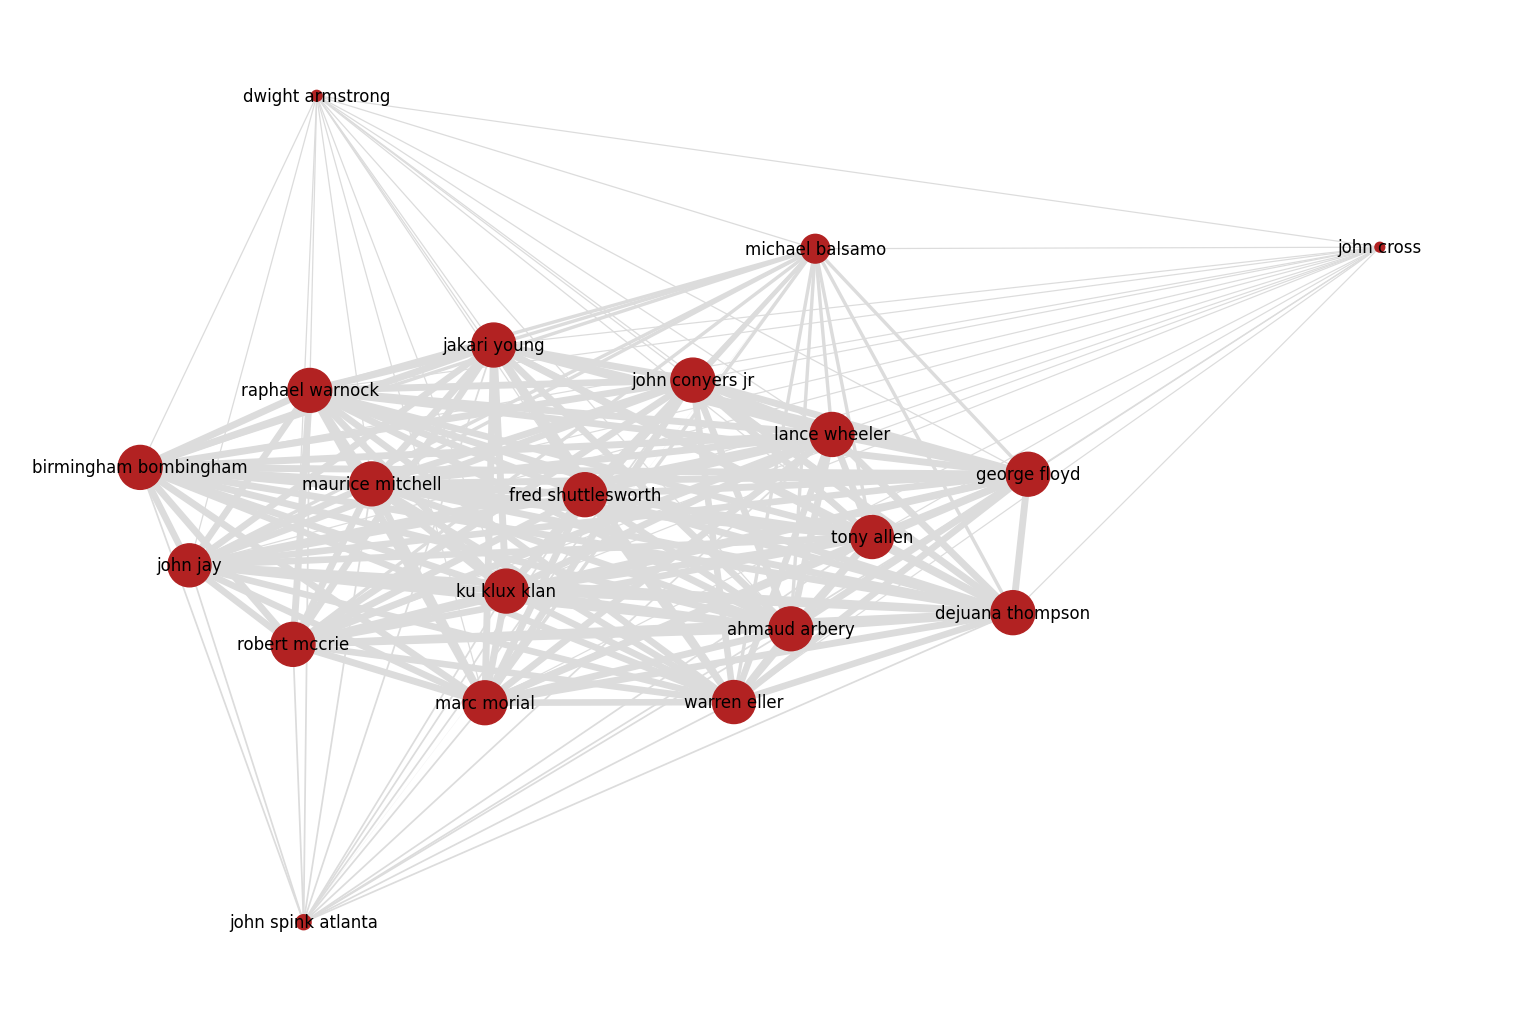

In [36]:
c_g=  t.cull_edges_by_weight(g, cull_below=20)
t.plot_ud_graph(c_g )

Clearly we are still picking up high volume news stories or talking heads involved with racism and racial injustice generally in the USA, rather than actual POIs in AD. \
Understandably appears biased towards
- AP USLE editor Mike Balsamo https://www.linkedin.com/in/mikebalsamo/
- Maurice Mitchell https://workingfamilies.org/about-maurice-mitchell/
- George Floyd & Ahmaud Arbery

Change our angle of investigation - let's compile a list of known AD/AD-linked names, query for them, and graph that result

source - https://www.splcenter.org/fighting-hate/extremist-files/group/atomwaffen-division  only names given as ad members, not linked/influencing groups

In [41]:
ad_names = [
    "john cameron denton",
    "Grayson Patrick Denton",
    "brandon clint russel",
    "devon arthurs",
    "stephen billingsley",
    "andrew oneschuk",
    "jeremy himmelman",
    "william james tschantre",
    "william tschantre",
    "joshua Caleb Sutter",
     "Jillian Hoy",
     "Kaleb James Cole",
     "Sean Michael Fernandez",
     "Michael Lloyd Hubsky",
     "Samuel Woodward",
     "Vasillios Pistolis",
     "Gabriel Sohier Chaput",
     "Benjamin Bogard",
     "Brian Patrick Baynes",
     "Aiden Bruce-Umbaugh",
     "Andrew Jon Thomasberg",
     "Taylor Ashley Parker-Dipeppe",
      "Johnny Roman Garza",
      "Sarah Beth Clendaniel"
]
ad_names = [name.lower() for name in ad_names]

In [46]:
importlib.reload(t)

df = t.sql_query(
    client,
    search_cols=["Persons"]*len(ad_names),
    kwd_list=ad_names,
    and_or = "OR"
)


<function sql_query at 0x00000216DF75FD80>
 Persons like '%john cameron denton%' OR
 Persons like '%grayson patrick denton%' OR
 Persons like '%brandon clint russel%' OR
 Persons like '%devon arthurs%' OR
 Persons like '%stephen billingsley%' OR
 Persons like '%andrew oneschuk%' OR
 Persons like '%jeremy himmelman%' OR
 Persons like '%william james tschantre%' OR
 Persons like '%william tschantre%' OR
 Persons like '%joshua caleb sutter%' OR
 Persons like '%jillian hoy%' OR
 Persons like '%kaleb james cole%' OR
 Persons like '%sean michael fernandez%' OR
 Persons like '%michael lloyd hubsky%' OR
 Persons like '%samuel woodward%' OR
 Persons like '%vasillios pistolis%' OR
 Persons like '%gabriel sohier chaput%' OR
 Persons like '%benjamin bogard%' OR
 Persons like '%brian patrick baynes%' OR
 Persons like '%aiden bruce-umbaugh%' OR
 Persons like '%andrew jon thomasberg%' OR
 Persons like '%taylor ashley parker-dipeppe%' OR
 Persons like '%johnny roman garza%' OR
 Persons like '%sarah be

In [48]:
g = t.undirected_graph_from_str_col(df = df, str_col="Persons", max_nodes=100)

100%|██████████| 10000/10000 [01:01<00:00, 161.81it/s]


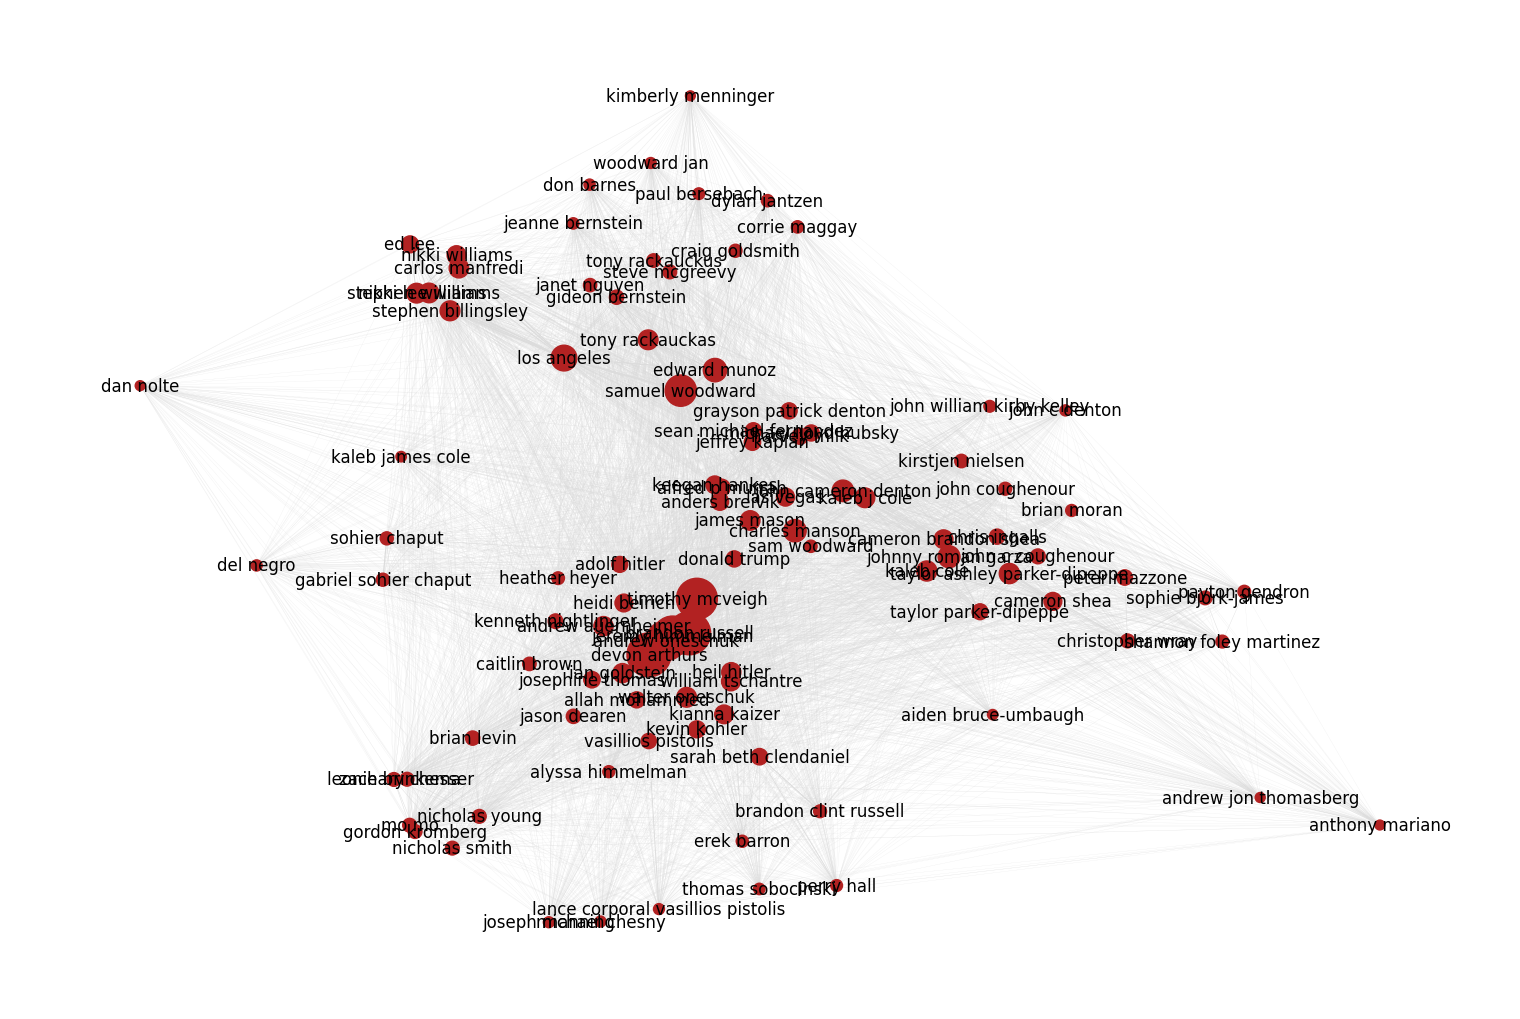

In [61]:
importlib.reload(t)
t.plot_ud_graph(g)

Nice - we have found  AD linked names that weren't in the original list:

- Cameron shea https://www.theguardian.com/world/2020/mar/06/neo-nazi-arrests-deals-blow-us-group-atomwaffen-

Lets see all the new names we have found

In [65]:
from itertools import filterfalse

def list_subtract(main_list:List=None, remove_list:List=None)-> List:
    return list(filterfalse(remove_list.__contains__, main_list))


def trim_graph(g, remove_list:List=None):
    node_list = g.nodes
    new_nodes = list_subtract(node_list, remove_list)
    print(f"removed {len(node_list)-len(new_nodes)} nodes!")
    return g.subgraph(new_nodes)

new_g = trim_graph(g, ad_names)
for node in new_g.nodes:
    print(node)

removed 18 nodes!
brandon russell
timothy mcveigh
los angeles
tony rackauckas
edward munoz
kaleb cole
charles manson
stephen williams
nikki lee williams
carlos manfredi
cameron brandon shea
tony rackauckus
cameron shea
ian goldstein
donald trump
nikki williams
andrew auernheimer
gideon bernstein
brandon clint russell
heidi beirich
kirstjen nielsen
walter oneschuk
taylor parker-dipeppe
kaleb j cole
allah mohammed
lance corporal vasillios pistolis
james mason
adolf hitler
ed lee
heil hitler
sohier chaput
kianna kaizer
josephine thomas
peter mazzone
chris ingalls
john c coughenour
las vegas
janet nguyen
perry hall
heather heyer
kevin kohler
steve mcgreevy
erek barron
craig goldsmith
john william kirby kelley
keegan hankes
christopher wray
kenneth nightlinger
brian levin
woodward jan
anders breivik
sophie bjork-james
del negro
jeanne bernstein
sam woodward
jason dearen
alfred p murrah
corrie maggay
michael chesny
john coughenour
joseph manning
thomas sobocinski
dylan jantzen
don barnes
zac

This is a much more focused view - there are still many nodes of general association ("Adolf Hitler"), and nodes representing LEO/public officials investigating white supremacy (FBI agent Thomas Sobocinski https://www.chds.us/c/power-station-attacks/).

But we are getting a much more well-constrained network.

Lets do some manual cleaning, then start seeing what else we can graph

In [40]:
df_ = df.dropna(subset=["Themes"])
print(df_[df_[ "Themes"].str.contains("NEO_NAZI")]["Themes"].to_markdown())

|      | Themes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [41]:
df= t.sql_query(client, search_cols=["Themes", kwd="NEO_NAZI")
print(df.shape)

(76421, 27)


In [42]:
print(df.columns)

Index(['GKGRECORDID', 'DATE', 'SourceCollectionIdentifier', 'SourceCommonName',
       'DocumentIdentifier', 'Counts', 'V2Counts', 'Themes', 'V2Themes',
       'Locations', 'V2Locations', 'Persons', 'V2Persons', 'Organizations',
       'V2Organizations', 'V2Tone', 'Dates', 'GCAM', 'SharingImage',
       'RelatedImages', 'SocialImageEmbeds', 'SocialVideoEmbeds', 'Quotations',
       'AllNames', 'Amounts', 'TranslationInfo', 'Extras'],
      dtype='object')


In [47]:
g = undirected_graph_from_str_col(df, str_col = "Organizations", date_col="DATE")

100%|██████████| 2500/2500 [01:30<00:00, 27.69it/s]


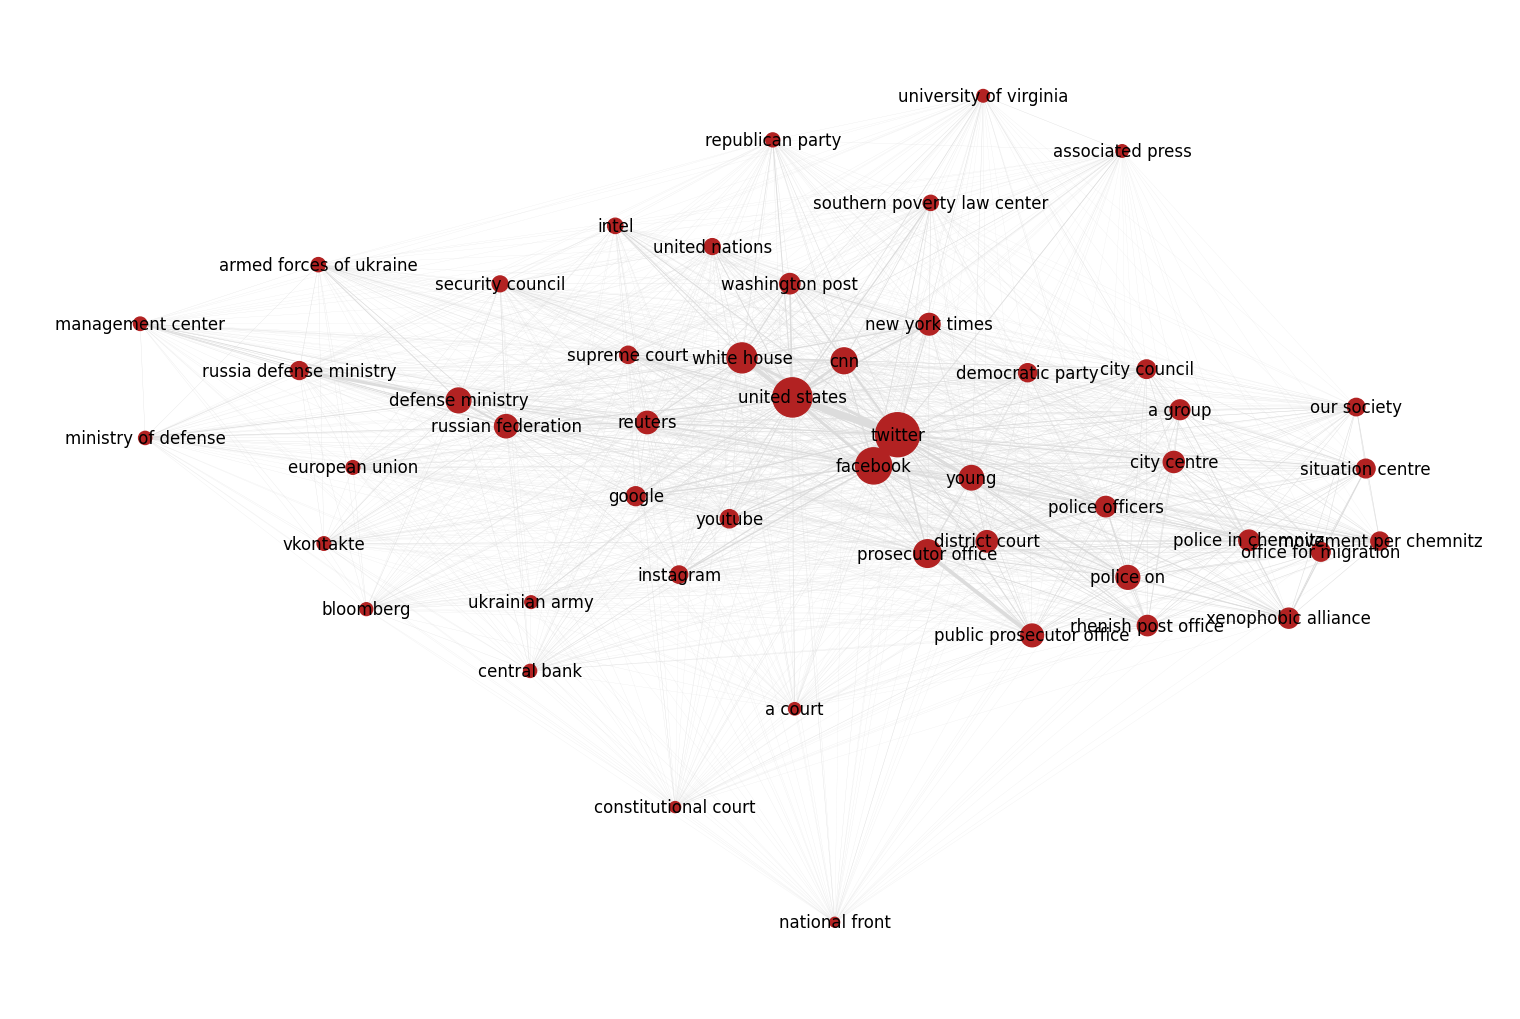

In [49]:

plot_ud_graph(g)